In [1]:
#%matplotlib
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import scipy.integrate as sc
import scipy.optimize as optimize
import scipy.interpolate



In [2]:
cs_factor = 2.67
import scipy.special as special
mv_test = 1
kvec = [1]
k_ind = 0
k = kvec[k_ind]
H0=67
Omega_M = 0.3
Omega_R = 7e-5
Omega_lambda = 1 - Omega_M - Omega_R
Tv_k = 1.947
# in MeV
kb = 8.617e-11 # MeV/K
T0 = Tv_k * kb
# 
h = 0.6704
cosmo_dict ={'H0':H0, 'Omega_cdm':Omega_M, 'k_output_values':str(kvec).strip('[]'), "N_ncdm":1,
             "m_ncdm":mv_test # massen er givet i eV s' jeg min egen test m_v skal være en faktor  1e-6 mindre
           ,'output':'tCl, lCl, dTk, vTk, pCl', 'lensing':'yes',
            "ncdm_fluid_approximation":3
            }
H0 /= (3*1e5) # i 1/Mpc
cosmo = Class()
cosmo.set(cosmo_dict)
cosmo.compute()
bg = cosmo.get_background()
pts = cosmo.get_perturbations()['scalar']
print(bg.keys())

#print(pts[0].keys())
z = bg["z"]
a = 1/(z+1)
aend = a[-1]
a0 = a[0]
mv = mv_test * 1e-6
# cs front faktoren



    # udregner Hubbleparameteren

def H(a):
    return H0 * np.sqrt(Omega_lambda + Omega_M /( a **3) + Omega_R /( a**4)) 

# udregnger tau 

def tau_cal(a,y):
    # Vores "tids"-værdi i denne differentialligning er a
    tau = y[0]
    d_tau = 1 / (a ** 2 * H(a))
    return np.array(d_tau)

# temperatur

def Tv(a):
    return T0 / a # in MeV

# lydhastighed

def cs(a,mv,factor):
    return factor * Tv(a) / mv

# udregn a
def a_solve(tau,y):
    a = y[0]
    a_dt = a * a * H(a)
    return [a_dt]

delta_class = pts[k_ind]["delta_cdm"]
theta_class = pts[k_ind]["theta_cdm"]
tau_class = pts[k_ind]["tau [Mpc]"]
delta_neutrino_class = pts[k_ind]["delta_ncdm[0]"]
theta_neutrino_class = pts[k_ind]["theta_ncdm[0]"]
a_class = pts[k_ind]["a"]
interp_tau_from_a = scipy.interpolate.interp1d(a_class,tau_class)
z = 3600
z = 800
#z = 3000
a0 = 1/(1+z)
T_ini = interp_tau_from_a(a0)
a_span = [a0,1]

delta_init = scipy.interpolate.interp1d(tau_class,delta_class)
theta_init = scipy.interpolate.interp1d(tau_class,theta_class)
neu_interp = scipy.interpolate.interp1d(a_class,delta_neutrino_class)
a_interp = scipy.interpolate.interp1d(tau_class,a_class)
tau = np.linspace(T_ini,1,100)
a_neu = a_interp(tau)
neutrino = neu_interp(a_neu)
beta = ((cs_factor*k*T0)/(H0*mv))**2 / Omega_M
delta0 = delta_init(T_ini)

def func_det_hele(τ,y,k,mv,factor):
    delta = y[0]
    d_delta = y[1]    
    a = a_interp(τ)
    d2_delta = - a*H(a)*d_delta+ /2 * H0 ** 2 * delta / a    
    return [d_delta,d2_delta]



def func_det_hele(τ,y,k,mv,factor):
    delta = y[0]
    d_delta = y[1]    
    a = a_interp(τ)
    d2_delta = - a*H(a)*d_delta+ /2 * H0 ** 2 * delta / a    
    return [d_delta,d2_delta]








dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_ncdm[0]', '(.)p_ncdm[0]', '(.)rho_lambda', '(.)rho_ur', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])


4.5297488450777764e+29
-106.22767890622362


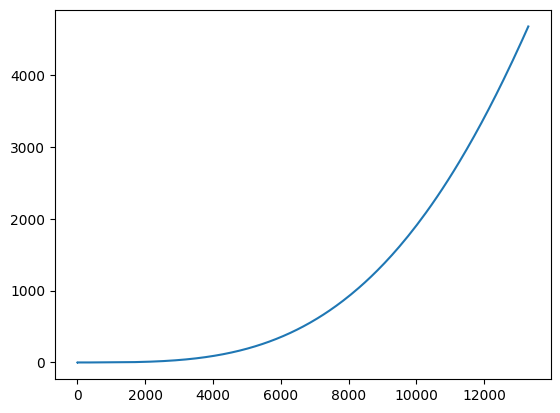

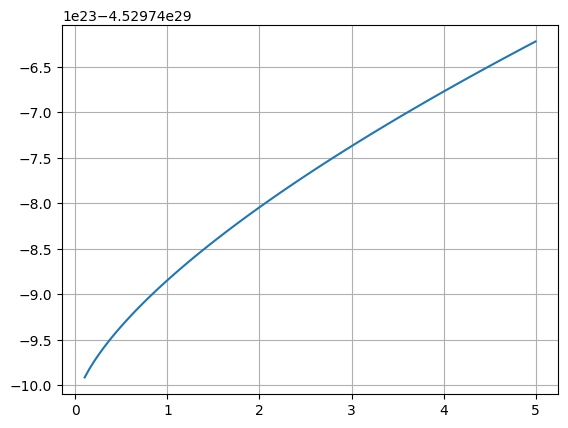

In [31]:
def g(t):
    c =  cs(1,mv,cs_factor) # alle factorerne i cs(a)
    d0 = delta0#/a0
    #d0 = 1
    #c=10**0.5
    k=1
    return (d0*(-560 + 840 * (c*k)**2 * t**(2/3) - 378 * (c*k)**4 * t**(4/3) + 81*(c*k)**6 * t**2) 
            + (27*(c*k)**7 * (2*np.cos(3*c*k*t**(1/3)) + np.sin(3*c*k*t**(1/3)))) / (t**(1/3))) / (81 * c**8*k**8 )

print(g(1))

print(delta0)
t = np.linspace(0.1,5,100)
# t = bg["proper time [Gyr]"]*365*24*60*60
#plt.plot(a_class,g(a_class,tau_class))
#print(t)
#plt.loglog(a_class,-delta_neutrino_class)
#a = np.logspace(np.log10(a0),0,30)
plt.plot(tau_class,-delta_neutrino_class)
plt.figure(2)
plt.plot(t,-g(t))

#plt.loglog(a,-f(a,0))
plt.grid()


![Sk%C3%A6rmbillede%202023-03-06%20083719.png](attachment:Sk%C3%A6rmbillede%202023-03-06%20083719.png)
